In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.stats as stats

## Lecture 19 Assignment

Answer the questions below in a Jupyter notebook and submit a PDF of your notebook:

 

1. Find and plot the a posteriori probabilities for getting 8 heads on 8 flips of a fair coin for a prior probabilities of your choice that have a peak around probability of heads equal to 0.5 (and that satisfy the requirements further below).

2. Determine the 95% and 99% confidence intervals under the a priori probabilities you created.

3. Determine whether you should reject the possibility that the coin is fair using the a priori probabilities that you created. Briefly explain how you reached your conclusions.

 

Some requirements on the a priori probabilities:

1. Make the a priori probabilities based on some function of the probability of heads. For instance, the function could be a combination of linear functions, a quadratic function, a function like exp( - | (something) |), etc.

2. Do not use any significant constant sections of your function. In particular, do not just use the existing a prior probabilities and then increase the probability at or around 0.5.

3. Sample your a priori probabilities at steps of no bigger than 0.01 (same as in class).

4. If you provide results for more than one interesting prior, we may award you bonus points.




**With the Uniform Prior, we had**

In [3]:
def exactcoins(flips=8, target=-1, num_sims=100000):
    
    if target==-1:
        target=flips
        
    allcoins=np.linspace(0,1,101)
    
    events=[]
    for sim in range(num_sims):
        prob_heads=npr.choice(allcoins)
        R=npr.uniform(size=flips)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
            
    vals,counts=np.unique(events,return_counts=True)
    plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    
    return events

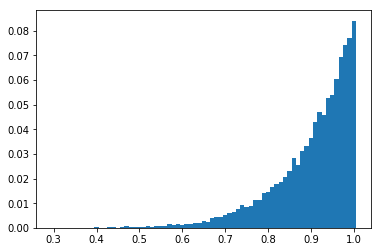

In [4]:
events=exactcoins()

In [5]:
def confidence_interval2(data, C):
    ''' Find the C% confidence interval given data'''
    pbar=1-C/100

    vals,counts=np.unique(data,return_counts=True)


    sum_counts=np.cumsum(counts/len(data))
    # locate the lowest value for which the cumulative sum exceeds the specified probability
    lower=np.nonzero(sum_counts>=pbar/2)[0][0]
    upper=np.nonzero(sum_counts>=(1-pbar/2))[0][0]
                  
    plt.bar(vals,sum_counts,width=0.01)
    plt.plot(vals,[pbar/2]*len(vals),'r')
    plt.plot(vals,[(1-pbar/2)]*len(vals),'g')
    
    print(C,"% confidence interval:[",vals[lower],",",vals[upper],"]")

95 % confidence interval:[ 0.67 , 1.0 ]


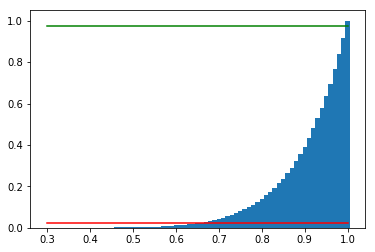

In [6]:
confidence_interval2(events,95)

99 % confidence interval:[ 0.54 , 1.0 ]


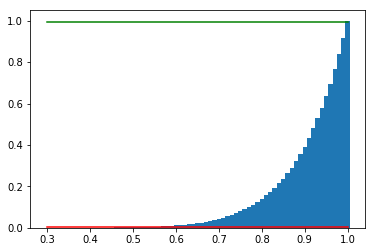

In [7]:
confidence_interval2(events,99)

### Generating a Nonuniform Prior:

In [8]:
vals = np.linspace(0,1,101)

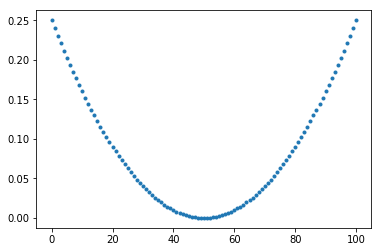

In [9]:
plt.plot((vals-0.5)**2,'.')

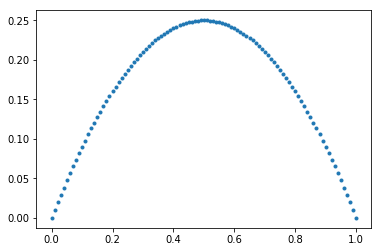

In [10]:
plt.plot(vals,0.25-(vals-0.5)**2,'.')

In [11]:
unnorm = 0.25-(vals-0.5)**2
sum(unnorm)

16.664999999999992

In [12]:
probs = unnorm/sum(unnorm)

1.0000000000000004

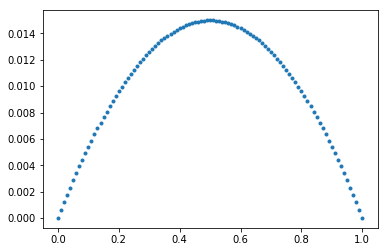

In [13]:
plt.plot(vals, probs, '.');
sum(probs)

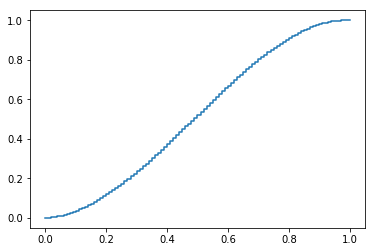

In [14]:
# cumulative distribution function (cdf)
plt.step(vals,np.cumsum(probs));

In [15]:
ap = stats.rv_discrete(values=(vals,probs))

In [16]:
ap.rvs(size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

What do you observe?

It doesnt work!!

stats.rv_discrete only works for integer-valued discrete RVs

In [17]:
ap = stats.rv_discrete(values=(range(len(vals)),probs))

In [18]:
vals[ap.rvs(size=10)]

array([0.95, 0.32, 0.54, 0.47, 0.38, 0.53, 0.53, 0.08, 0.69, 0.76])

In [19]:
test = vals[ap.rvs(size=100000)]

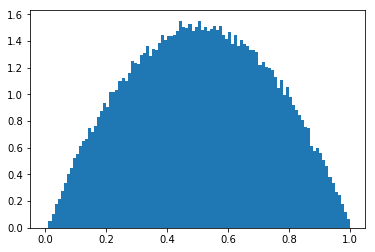

In [20]:
plt.hist(test, bins=vals, density=True);

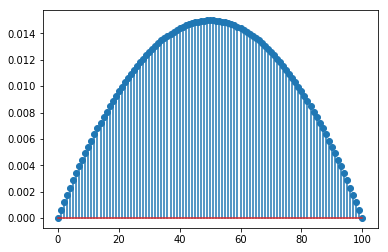

In [21]:
plt.stem(ap.pmf(range(len(vals))));

In [22]:
def exactcoins2(flips=8, target=-1, num_sims=100000):
    
    if target==-1:
        target=flips
    
    # set up the a priori distribution here
    vals = np.linspace(0,1,101)
    unnorm = 0.25-(vals-0.5)**2 # make unnormalized PMF
    probs = unnorm/sum(unnorm) # normalize it to make valid probs
    ap = stats.rv_discrete(values=(range(len(vals)),probs)) # create our discrete RV object
    
    # grab a random index and 
    
    events=[]
    for sim in range(num_sims):
        prob_heads=vals[ap.rvs()] # grab a random index and map it back to the value
        R=npr.uniform(size=flips)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
            
    vals,counts=np.unique(events,return_counts=True)
    plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    
    return events

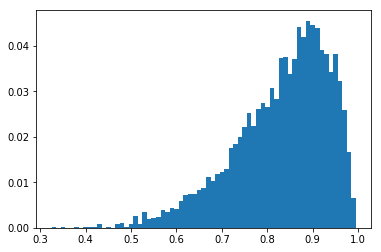

In [24]:
events2=exactcoins2()

95 % confidence interval:[ 0.58 , 0.97 ]


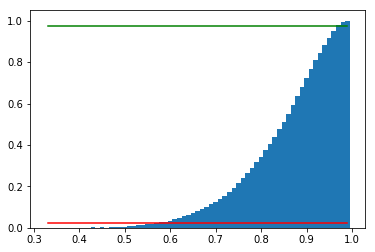

In [26]:
confidence_interval2(events2,95)

99 % confidence interval:[ 0.5 , 0.99 ]


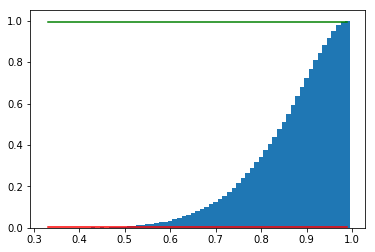

In [27]:
confidence_interval2(events2,99)

## Properties of Distribution Functions -- See Handout

## Uniform Continuous Random Variables

Previously, we introduced a way to choose random values from the interval $[0,1)$:

In [29]:
npr.random(size=20)

array([0.7298426 , 0.02342212, 0.12823727, 0.013913  , 0.52001198,
       0.28629908, 0.51311827, 0.31027519, 0.08240854, 0.58022238,
       0.38978304, 0.00392387, 0.66399284, 0.17137142, 0.45293394,
       0.72279844, 0.47490595, 0.49285623, 0.16619262, 0.78714984])

We could also use scipy.stats for this:

In [30]:
U=stats.uniform()

In [31]:
U.rvs(20)

array([0.46399178, 0.29315176, 0.86485235, 0.37668269, 0.33960491,
       0.00358872, 0.22402621, 0.70990911, 0.38030713, 0.34758595,
       0.31919321, 0.86700555, 0.91859199, 0.04195151, 0.9727895 ,
       0.34219423, 0.3473171 , 0.44459118, 0.57491403, 0.42258039])

Find $F_U(0.2)=P(U \le u)$ for $u=0.2$:

In [34]:
u=0.2
num_sims=100000
Uvals= U.rvs(size=num_sims)
np.sum(Uvals<=0.2)/num_sims

0.201

In [37]:
uvals=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

num_sims = 100000
Uvals=U.rvs(size=num_sims)

for u in uvals:
    print("Prob(U<=",u,")=~",np.sum(Uvals<=u)/num_sims,sep="")

Prob(U<=0.0)=~0.0
Prob(U<=0.2)=~0.19982
Prob(U<=0.4)=~0.40105
Prob(U<=0.6)=~0.59903
Prob(U<=0.8)=~0.80019
Prob(U<=1.0)=~1.0


So, what is the distribution function for U?

$F_U(u)=u, -- 0\le u \le 1$

Check:

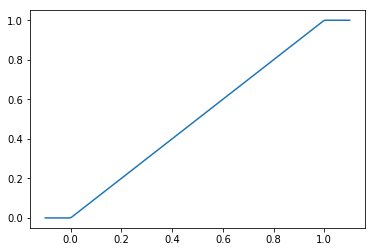

In [54]:
uvals=np.linspace(-0.1,1.1,200)
plt.plot(uvals,U.cdf(uvals))

Find $P(0.25 < U \le 0.75)$:

In [40]:
U.cdf(0.75)-U.cdf(0.25)

0.5

Find $P(0.45 < U \le 0.55)$

In [41]:
U.cdf(0.55)-U.cdf(0.45)

0.10000000000000003

Note that since $F_U(u)=u$, then $F_U(b)-F_U(a)=b-a$

So what is  $P(0.4995 < U \le 0.5005)$?

In [42]:
0.5005-0.4995

0.0009999999999999454

Then what is $P(U=0.5)$?

In [51]:
0

0

In general, what is $P(U=u)$?

In [52]:
0

0